In [267]:
import math
import yaml, os, argparse
import time
import numpy as np
import matplotlib.pyplot as plt
import colorsys
from skimage.color import hsv2rgb
import cv2
from collections import deque
from scipy.special import softmax


class Mooveemodel:
    def __init__(self, x_init, y_init, mu_s, sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity):
        self.mu = np.array([mu_s,0.])
        self.theta = np.array([theta_speed,theta_angular_velocity])
        self.sigma = np.array([sigma_speed,sigma_angular_velocity])
        self.v = np.array(self.mu)
        self.dt = np.ones(2)
        self.rng = np.random.default_rng()
        self.pos = np.array([x_init,y_init])
        self.angle = 0.
        self.os = np.array(self.mu)
        self.s = 0
        self.updateSpeed()

    def updateSpeed(self):
        os1 = self.os
        mu1 = self.mu
        theta1 = self.theta
        dt1 = self.dt
        sigma1 = self.sigma
        rng1 = self.rng
        
        self.os = (os1
            + theta1 * (mu1 - os1) * dt1
            + sigma1 * rng1.normal(0,np.sqrt(dt1),2)
        )
        
        self.angle = self.angle + self.os[1] * dt1[1]
        
        #self.s = np.log1p(np.exp(self.os[0]))
        self.s = abs(self.os[0])
        self.v[0] = self.s*np.cos(self.angle)
        self.v[1] = self.s*np.sin(self.angle)

        return self.v

    def updatePosition(self, side):
        new_pos = self.pos + self.v * self.dt
        self.pos = new_pos % side
        is_same_panel = True if np.all(new_pos == self.pos) else False
        return self.pos, is_same_panel

    def getDirection(self):
        return np.degrees(np.arctan2(self.v[1],self.v[0]))



In [399]:
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 15, 0, 0, 0, 0, 'A: continuous speed movement in a straight line', 'a'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 7, 15, 0, 0.1, 0, 'B: straight line, OU speed process', 'b'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname = 10, 0.3, 0.05, 0, 0.5, 'C slow acceleration OU', 'c'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 8, 10, .1, 0.1, 0.3, 'D OU process', 'd'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 15, 3, 0.1, 1.8, 0.5, 'E: OU process', 'e'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))


python moveellipse.py -p 1000 -t 0 -a 0 -b 0 -s 0 -d a -m 15
python moveellipse.py -p 1000 -t 0.1 -a 0 -b 0 -s 15 -d b -m 7
python moveellipse.py -p 1000 -t 0 -a 0.05 -b 0.5 -s 0.3 -d c -m 10
python moveellipse.py -p 1000 -t 0.1 -a 0.1 -b 0.3 -s 10 -d d -m 8
python moveellipse.py -p 1000 -t 1.8 -a 0.1 -b 0.5 -s 3 -d e -m 15


Speed: sigma=0.3, theta=0
Angular velocity: sigma=0.05, theta=0.5


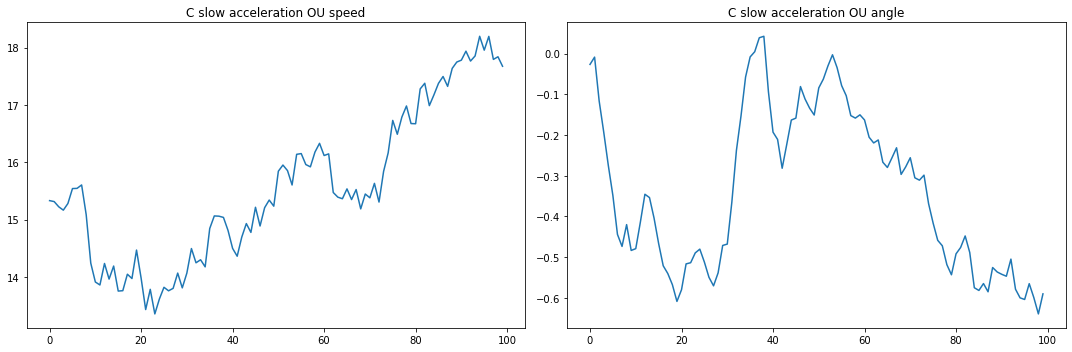

In [388]:

mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname = 15, 0.3, 0.05, 0, 0.5, 'C slow acceleration OU', 'c'
mm = Mooveemodel(0,0, mu_s, sigma_speed,sigma_angular_velocity,theta_speed, theta_angular_velocity)
angles = []
speeds_mag = []
for _ in range(100):
    aa = mm.angle
    angles.append(aa)
    speeds_mag.append(mm.s)
    mm.updateSpeed()

f, ax = plt.subplots(1,2, figsize=(15,5))
polots = ax.flatten()
polots[0].plot(speeds_mag)
polots[0].set_title(name + " speed")
polots[1].plot(angles)
polots[1].set_title(name + " angle")
f.tight_layout()
s_str = 'Speed: sigma={0}, theta={1}'.format(sigma_speed,theta_speed)
a_str = 'Angular velocity: sigma={0}, theta={1}'.format(sigma_angular_velocity,theta_angular_velocity)
print(s_str)
print(a_str)

python moveellipse.py -p 1000 -t 0 -a 0 -b 0 -s 0 -d a -m 15
Speed: sigma=0, theta=0
Angular velocity: sigma=0, theta=0
python moveellipse.py -p 1000 -t 0.1 -a 0 -b 0 -s 15 -d b -m 7
Speed: sigma=15, theta=0.1
Angular velocity: sigma=0, theta=0
python moveellipse.py -p 1000 -t 0 -a 0.05 -b 0.5 -s 0.3 -d c -m 10
Speed: sigma=0.3, theta=0
Angular velocity: sigma=0.05, theta=0.5
python moveellipse.py -p 1000 -t 0.1 -a 0.1 -b 0.3 -s 10 -d d -m 8
Speed: sigma=10, theta=0.1
Angular velocity: sigma=0.1, theta=0.3
python moveellipse.py -p 1000 -t 1.8 -a 0.1 -b 0.5 -s 3 -d e -m 15
Speed: sigma=3, theta=1.8
Angular velocity: sigma=0.1, theta=0.5


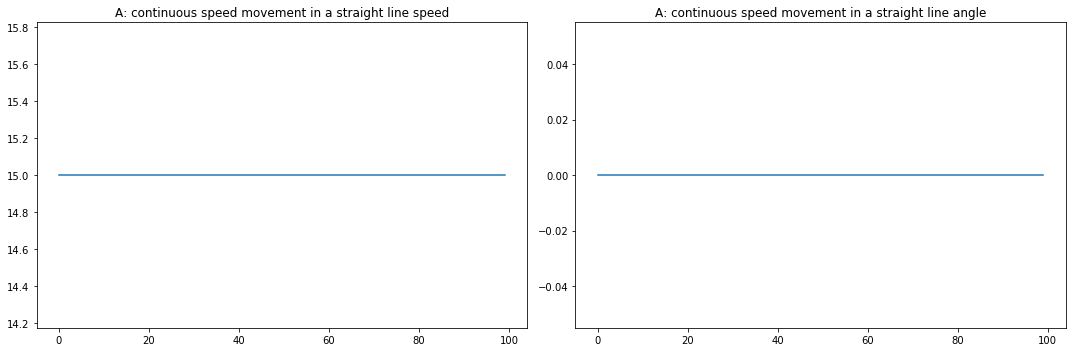

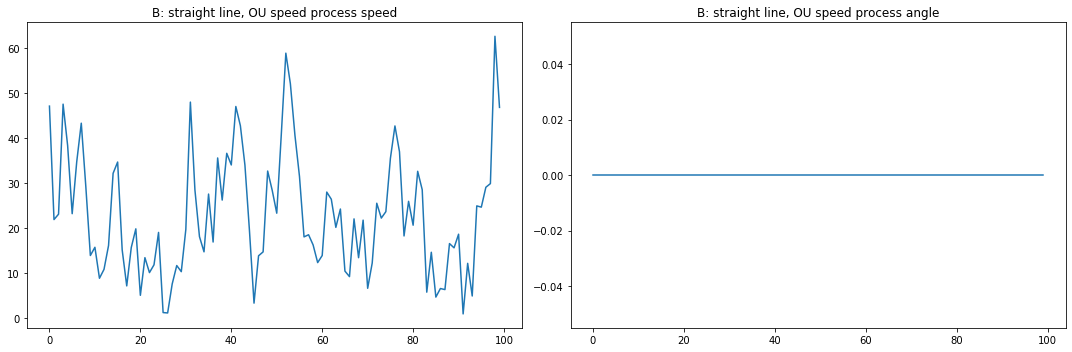

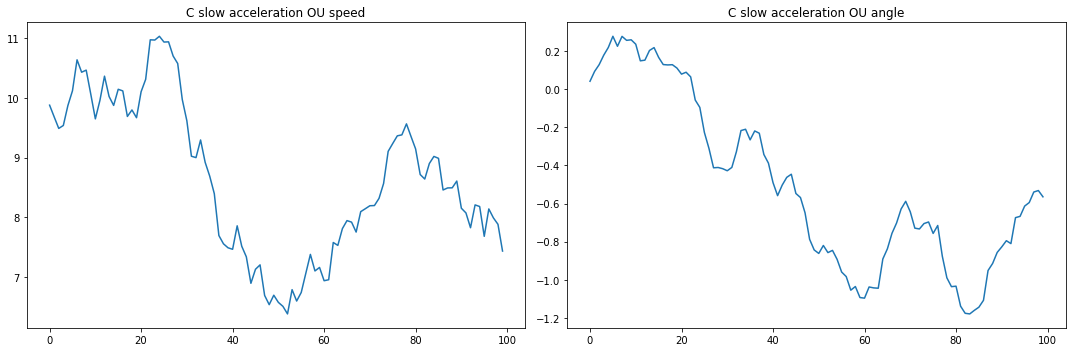

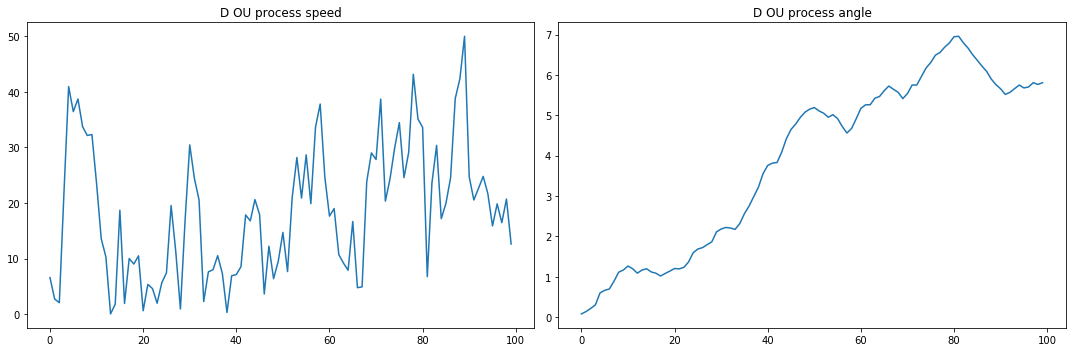

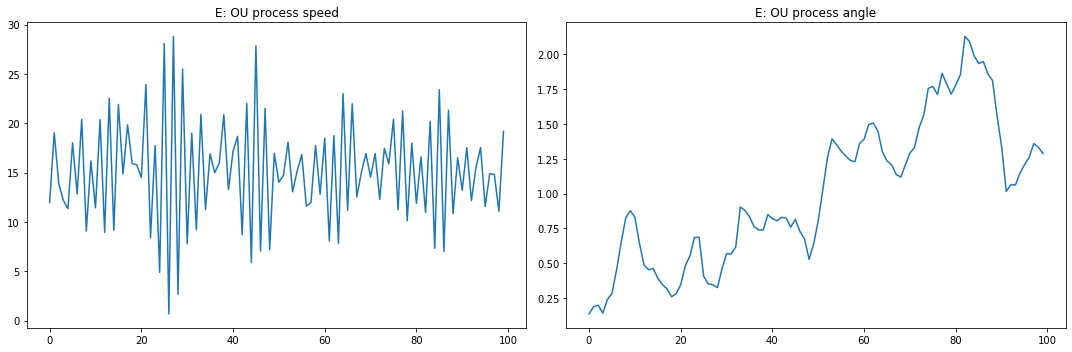

In [398]:

mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 15, 0, 0, 0, 0, 'A: continuous speed movement in a straight line', 'a'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mm = Mooveemodel(0,0, mu_s, sigma_speed,sigma_angular_velocity,theta_speed, theta_angular_velocity)
angles = []
speeds_mag = []
for _ in range(100):
    aa = mm.angle
    angles.append(aa)
    speeds_mag.append(mm.s)
    mm.updateSpeed()

f, ax = plt.subplots(1,2, figsize=(15,5))
polots = ax.flatten()
polots[0].plot(speeds_mag)
polots[0].set_title(name + " speed")
polots[1].plot(angles)
polots[1].set_title(name + " angle")
f.tight_layout()
s_str = 'Speed: sigma={0}, theta={1}'.format(sigma_speed,theta_speed)
a_str = 'Angular velocity: sigma={0}, theta={1}'.format(sigma_angular_velocity,theta_angular_velocity)
print(s_str)
print(a_str)
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 7, 15, 0, 0.1, 0, 'B: straight line, OU speed process', 'b'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mm = Mooveemodel(0,0, mu_s, sigma_speed,sigma_angular_velocity,theta_speed, theta_angular_velocity)
angles = []
speeds_mag = []
for _ in range(100):
    aa = mm.angle
    angles.append(aa)
    speeds_mag.append(mm.s)
    mm.updateSpeed()

f, ax = plt.subplots(1,2, figsize=(15,5))
polots = ax.flatten()
polots[0].plot(speeds_mag)
polots[0].set_title(name + " speed")
polots[1].plot(angles)
polots[1].set_title(name + " angle")
f.tight_layout()
s_str = 'Speed: sigma={0}, theta={1}'.format(sigma_speed,theta_speed)
a_str = 'Angular velocity: sigma={0}, theta={1}'.format(sigma_angular_velocity,theta_angular_velocity)
print(s_str)
print(a_str)
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname = 10, 0.3, 0.05, 0, 0.5, 'C slow acceleration OU', 'c'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mm = Mooveemodel(0,0, mu_s, sigma_speed,sigma_angular_velocity,theta_speed, theta_angular_velocity)
angles = []
speeds_mag = []
for _ in range(100):
    aa = mm.angle
    angles.append(aa)
    speeds_mag.append(mm.s)
    mm.updateSpeed()

f, ax = plt.subplots(1,2, figsize=(15,5))
polots = ax.flatten()
polots[0].plot(speeds_mag)
polots[0].set_title(name + " speed")
polots[1].plot(angles)
polots[1].set_title(name + " angle")
f.tight_layout()
s_str = 'Speed: sigma={0}, theta={1}'.format(sigma_speed,theta_speed)
a_str = 'Angular velocity: sigma={0}, theta={1}'.format(sigma_angular_velocity,theta_angular_velocity)
print(s_str)
print(a_str)
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 8, 10, .1, 0.1, 0.3, 'D OU process', 'd'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mm = Mooveemodel(0,0, mu_s, sigma_speed,sigma_angular_velocity,theta_speed, theta_angular_velocity)
angles = []
speeds_mag = []
for _ in range(100):
    aa = mm.angle
    angles.append(aa)
    speeds_mag.append(mm.s)
    mm.updateSpeed()

f, ax = plt.subplots(1,2, figsize=(15,5))
polots = ax.flatten()
polots[0].plot(speeds_mag)
polots[0].set_title(name + " speed")
polots[1].plot(angles)
polots[1].set_title(name + " angle")
f.tight_layout()
s_str = 'Speed: sigma={0}, theta={1}'.format(sigma_speed,theta_speed)
a_str = 'Angular velocity: sigma={0}, theta={1}'.format(sigma_angular_velocity,theta_angular_velocity)
print(s_str)
print(a_str)
mu_s ,sigma_speed, sigma_angular_velocity, theta_speed, theta_angular_velocity, name, dirname= 15, 3, 0.1, 1.8, 0.5, 'E: OU process', 'e'
print('python moveellipse.py -p 1000 -t {} -a {} -b {} -s {} -d {} -m {}'.format(theta_speed, sigma_angular_velocity, theta_angular_velocity, sigma_speed, dirname, mu_s))
mm = Mooveemodel(0,0, mu_s, sigma_speed,sigma_angular_velocity,theta_speed, theta_angular_velocity)
angles = []
speeds_mag = []
for _ in range(100):
    aa = mm.angle
    angles.append(aa)
    speeds_mag.append(mm.s)
    mm.updateSpeed()

f, ax = plt.subplots(1,2, figsize=(15,5))
polots = ax.flatten()
polots[0].plot(speeds_mag)
polots[0].set_title(name + " speed")
polots[1].plot(angles)
polots[1].set_title(name + " angle")
f.tight_layout()
s_str = 'Speed: sigma={0}, theta={1}'.format(sigma_speed,theta_speed)
a_str = 'Angular velocity: sigma={0}, theta={1}'.format(sigma_angular_velocity,theta_angular_velocity)
print(s_str)
print(a_str)